In [86]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# stackloss demo
# read data (replace with your own path)
df = pd.read_csv('stackloss.csv', sep=';')
print(df)


    Id  Air.Flow  Water.Temp  Acid.Conc.  stack.loss
0    1        80          27          89          42
1    2        80          27          88          37
2    3        75          25          90          37
3    4        62          24          87          28
4    5        62          22          87          18
5    6        62          23          87          18
6    7        62          24          93          19
7    8        62          24          93          20
8    9        58          23          87          15
9   10        58          18          80          14
10  11        58          18          89          14
11  12        58          17          88          13
12  13        58          18          82          11
13  14        58          19          93          12
14  15        50          18          89           8
15  16        50          18          86           7
16  17        50          19          72           8
17  18        50          19          79      

In [87]:
# split into explanatory and response variables 
X = df.iloc[:,1:4]
Y = df.iloc[:,4]

# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred = reg.predict(X)

# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

Coefficients: [ 0.7156402   1.29528612 -0.15212252]
Intercept: -39.9196744201
MSE =  8.51571245706
R2s =  0.913576904461


In [88]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2)

    observed  predicted  residual
0         42  38.765363  3.234637
1         37  38.917485 -1.917485
2         37  32.444467  4.555533
3         28  22.302226  5.697774
4         18  19.711654 -1.711654
5         18  21.006940 -3.006940
6         19  21.389491 -2.389491
7         20  21.389491 -1.389491
8         15  18.144379 -3.144379
9         14  12.732806  1.267194
10        14  11.363703  2.636297
11        13  10.220540  2.779460
12        11  12.428561 -1.428561
13        12  12.050499 -0.050499
14         8   5.638582  2.361418
15         7   6.094949  0.905051
16         8   9.519951 -1.519951
17         8   8.455093 -0.455093
18         9   9.598257 -0.598257
19        15  13.587853  1.412147
20        15  22.237713 -7.237713


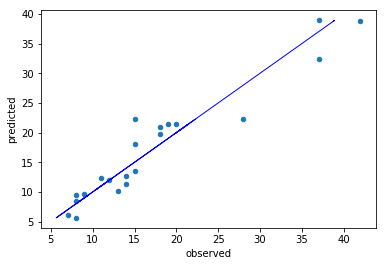

In [89]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

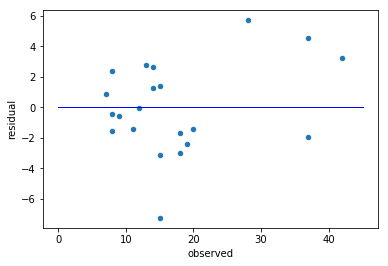

In [90]:
# plot residuals
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([0,45], [0,0], color='blue', linewidth=1)
plt.show()

In [91]:
# normalize variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
print(dfn)
Xn = dfn.iloc[:,1:4]
Yn = dfn.iloc[:,4]
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)


           0         1         2         3         4
0  -1.651446  2.187408  1.914273  0.519040  2.465745
1  -1.486301  2.187408  1.914273  0.327815  1.962043
2  -1.321157  1.628581  1.265890  0.710266  1.962043
3  -1.156012  0.175631  0.941699  0.136590  1.055377
4  -0.990867  0.175631  0.293316  0.136590  0.047972
5  -0.825723  0.175631  0.617508  0.136590  0.047972
6  -0.660578  0.175631  0.941699  1.283942  0.148712
7  -0.495434  0.175631  0.941699  1.283942  0.249453
8  -0.330289 -0.271430  0.617508  0.136590 -0.254250
9  -0.165145 -0.271430 -1.003450 -1.201988 -0.354991
10  0.000000 -0.271430 -1.003450  0.519040 -0.354991
11  0.165145 -0.271430 -1.327641  0.327815 -0.455731
12  0.330289 -0.271430 -1.003450 -0.819538 -0.657212
13  0.495434 -0.271430 -0.679258  1.283942 -0.556472
14  0.660578 -1.165553 -1.003450  0.519040 -0.959434
15  0.825723 -1.165553 -1.003450 -0.054636 -1.060175
16  0.990867 -1.165553 -0.679258 -2.731792 -0.959434
17  1.156012 -1.165553 -0.679258 -1.393214 -0.